# Logistic Regression and Neural Network Experiment
---
This file contains the implementation of the second and the third experiment presented in the report. The $3$ main parts here are as follows:

1. **Initialization:** In this section the needed libraries and the data are imported.
2. **Logistic Regression:** This section provides the main codes used to produce the result of the logistic regression experiment *(experiment 2)* in the report.
3. **Neural Network:** This section provides the main codes used to produce the result of the neural network experiment *(experiment 3)* in the report.

## 1. Initialization

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import optimizers
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.optimizers import Adam
from keras.layers.core import Activation
import tensorflow as tf

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)


print(X_train.shape)
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step
(60000, 784)


## 2. Logistic Regression
Below the codes for the logistic regression experiment on the MNIST data set is presented. The results of this experiment is shown in the Figure $2$ of the report.

In [3]:
# Fit the model
model = Sequential([
Dense(10, input_shape=(784,)),
Activation('softmax'),])

class SGDLearningRateTracker(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        if epoch == 0:
          lr =  K.eval(self.model.optimizer.lr)
        else:
          lr =  K.eval(self.model.optimizer.lr) / (np.sqrt(epoch))
        self.model.optimizer.lr = tf.Variable(lr)
        print('\nLR: {:.6f}\n'.format(K.eval(self.model.optimizer.lr)))

# define your model

adamObj_f = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamObj_t = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

model.compile(loss='mse', optimizer=adamObj_f)
history_f = model.fit(X_train, y_train, nb_epoch=500, batch_size = 128, callbacks=[SGDLearningRateTracker()])

model.compile(loss='mse', optimizer=adamObj_t)
history_t = model.fit(X_train, y_train, nb_epoch=500, batch_size = 128, callbacks=[SGDLearningRateTracker()])


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Acc: %.2f%%" % (100-scores*100))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
60000/60000 [==============================] - 3s 49us/step - loss: 0.0158

LR: 0.010000

Epoch 2/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0121

LR: 0.010000

Epoch 3/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0115

LR: 0.007071

Epoch 4/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0111

LR: 0.004082

Epoch 5/500
60000/60000 [==============================] - 2s 36us/step - loss: 0.0109

LR: 0.002041

Epoch 6/500
60000/60000 [==============================] - 2s 36us/step - loss: 0.0107

LR: 0.000913

Epoch 7/500
23040/60000 [==========>...................] - ETA: 1s - loss: 0.0103

60000/60000 [==============================] - 2s 37us/step - loss: 0.0105

LR: 0.000373

Epoch 8/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0104

LR: 0.000141

Epoch 9/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0104

LR: 0.000050

Epoch 10/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0103

LR: 0.000017

Epoch 11/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0102

LR: 0.000005

Epoch 12/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0103

LR: 0.000002

Epoch 13/500
26368/60000 [============>.................] - ETA: 1s - loss: 0.0098

60000/60000 [==============================] - 2s 37us/step - loss: 0.0101

LR: 0.000000

Epoch 14/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0099

LR: 0.000000

Epoch 15/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0100

LR: 0.000000

Epoch 16/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0098

LR: 0.000000

Epoch 17/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0098

LR: 0.000000

Epoch 18/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0098

LR: 0.000000

Epoch 19/500
27648/60000 [============>.................] - ETA: 1s - loss: 0.0096

60000/60000 [==============================] - 2s 37us/step - loss: 0.0097

LR: 0.000000

Epoch 20/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0096

LR: 0.000000

Epoch 21/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0095

LR: 0.000000

Epoch 22/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0096

LR: 0.000000

Epoch 23/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0095

LR: 0.000000

Epoch 24/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0095

LR: 0.000000

Epoch 25/500
29440/60000 [=============>................] - ETA: 1s - loss: 0.0092

60000/60000 [==============================] - 2s 37us/step - loss: 0.0094

LR: 0.000000

Epoch 26/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0095

LR: 0.000000

Epoch 27/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0093

LR: 0.000000

Epoch 28/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0092

LR: 0.000000

Epoch 29/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0093

LR: 0.000000

Epoch 30/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0092

LR: 0.000000

Epoch 31/500
27648/60000 [============>.................] - ETA: 1s - loss: 0.0090

60000/60000 [==============================] - 2s 37us/step - loss: 0.0092

LR: 0.000000

Epoch 32/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0092

LR: 0.000000

Epoch 33/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0091

LR: 0.000000

Epoch 34/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0091

LR: 0.000000

Epoch 35/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0092

LR: 0.000000

Epoch 36/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0090

LR: 0.000000

Epoch 37/500
25344/60000 [===========>..................] - ETA: 1s - loss: 0.0089

60000/60000 [==============================] - 2s 37us/step - loss: 0.0091

LR: 0.000000

Epoch 38/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0090

LR: 0.000000

Epoch 39/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0089

LR: 0.000000

Epoch 40/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0089

LR: 0.000000

Epoch 41/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0089

LR: 0.000000

Epoch 42/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0088

LR: 0.000000

Epoch 43/500
26624/60000 [============>.................] - ETA: 1s - loss: 0.0086

60000/60000 [==============================] - 2s 38us/step - loss: 0.0089

LR: 0.000000

Epoch 44/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0088

LR: 0.000000

Epoch 45/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0087

LR: 0.000000

Epoch 46/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0087

LR: 0.000000

Epoch 47/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0087

LR: 0.000000

Epoch 48/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0087

LR: 0.000000

Epoch 49/500
24448/60000 [===========>..................] - ETA: 1s - loss: 0.0087

60000/60000 [==============================] - 2s 37us/step - loss: 0.0087

LR: 0.000000

Epoch 50/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0086

LR: 0.000000

Epoch 51/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0086

LR: 0.000000

Epoch 52/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0087

LR: 0.000000

Epoch 53/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0086

LR: 0.000000

Epoch 54/500
60000/60000 [==============================] - 2s 36us/step - loss: 0.0086

LR: 0.000000

Epoch 55/500
28416/60000 [=============>................] - ETA: 1s - loss: 0.0087

60000/60000 [==============================] - 2s 37us/step - loss: 0.0085

LR: 0.000000

Epoch 56/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0085

LR: 0.000000

Epoch 57/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0086

LR: 0.000000

Epoch 58/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0084

LR: 0.000000

Epoch 59/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0085

LR: 0.000000

Epoch 60/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0085

LR: 0.000000

Epoch 61/500
26880/60000 [============>.................] - ETA: 1s - loss: 0.0085

60000/60000 [==============================] - 2s 37us/step - loss: 0.0084

LR: 0.000000

Epoch 62/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0084

LR: 0.000000

Epoch 63/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0084

LR: 0.000000

Epoch 64/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0084

LR: 0.000000

Epoch 65/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0084

LR: 0.000000

Epoch 66/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0083

LR: 0.000000

Epoch 67/500
26368/60000 [============>.................] - ETA: 1s - loss: 0.0083

60000/60000 [==============================] - 2s 38us/step - loss: 0.0082

LR: 0.000000

Epoch 68/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0083

LR: 0.000000

Epoch 69/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0083

LR: 0.000000

Epoch 70/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0082

LR: 0.000000

Epoch 71/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0082

LR: 0.000000

Epoch 72/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0083

LR: 0.000000

Epoch 73/500
27648/60000 [============>.................] - ETA: 1s - loss: 0.0083

60000/60000 [==============================] - 2s 37us/step - loss: 0.0082

LR: 0.000000

Epoch 74/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0082

LR: 0.000000

Epoch 75/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0082

LR: 0.000000

Epoch 76/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0081

LR: 0.000000

Epoch 77/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0083

LR: 0.000000

Epoch 78/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0082

LR: 0.000000

Epoch 79/500
25216/60000 [===========>..................] - ETA: 1s - loss: 0.0083

60000/60000 [==============================] - 2s 38us/step - loss: 0.0082

LR: 0.000000

Epoch 80/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0082

LR: 0.000000

Epoch 81/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0082

LR: 0.000000

Epoch 82/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0081

LR: 0.000000

Epoch 83/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0082

LR: 0.000000

Epoch 84/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0081

LR: 0.000000

Epoch 85/500
25088/60000 [===========>..................] - ETA: 1s - loss: 0.0077

60000/60000 [==============================] - 2s 38us/step - loss: 0.0081

LR: 0.000000

Epoch 86/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0080

LR: 0.000000

Epoch 87/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0082

LR: 0.000000

Epoch 88/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0081

LR: 0.000000

Epoch 89/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0081

LR: 0.000000

Epoch 90/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0080

LR: 0.000000

Epoch 91/500
26880/60000 [============>.................] - ETA: 1s - loss: 0.0081

60000/60000 [==============================] - 2s 37us/step - loss: 0.0080

LR: 0.000000

Epoch 92/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0079

LR: 0.000000

Epoch 93/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0079

LR: 0.000000

Epoch 94/500
60000/60000 [==============================] - 4s 61us/step - loss: 0.0081

LR: 0.000000

Epoch 95/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0080

LR: 0.000000

Epoch 96/500
56704/60000 [===========================>..] - ETA: 0s - loss: 0.0080

60000/60000 [==============================] - 3s 47us/step - loss: 0.0080

LR: 0.000000

Epoch 97/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0079

LR: 0.000000

Epoch 98/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0080

LR: 0.000000

Epoch 99/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0078

LR: 0.000000

Epoch 100/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0079

LR: 0.000000

Epoch 101/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0079

LR: 0.000000

Epoch 102/500
28288/60000 [=============>................] - ETA: 1s - loss: 0.0076

60000/60000 [==============================] - 2s 37us/step - loss: 0.0080

LR: 0.000000

Epoch 103/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0078

LR: 0.000000

Epoch 104/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0078

LR: 0.000000

Epoch 105/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0078

LR: 0.000000

Epoch 106/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0078

LR: 0.000000

Epoch 107/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0079

LR: 0.000000

Epoch 108/500
20992/60000 [=========>....................] - ETA: 1s - loss: 0.0074

60000/60000 [==============================] - 2s 38us/step - loss: 0.0078

LR: 0.000000

Epoch 109/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0078

LR: 0.000000

Epoch 110/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0077

LR: 0.000000

Epoch 111/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0077

LR: 0.000000

Epoch 112/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0078

LR: 0.000000

Epoch 113/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0079

LR: 0.000000

Epoch 114/500
17664/60000 [=======>......................] - ETA: 1s - loss: 0.0073

60000/60000 [==============================] - 2s 38us/step - loss: 0.0077

LR: 0.000000

Epoch 115/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0078

LR: 0.000000

Epoch 116/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0077

LR: 0.000000

Epoch 117/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0078

LR: 0.000000

Epoch 118/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0077

LR: 0.000000

Epoch 119/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0078

LR: 0.000000

Epoch 120/500
19456/60000 [========>.....................] - ETA: 1s - loss: 0.0076

60000/60000 [==============================] - 2s 39us/step - loss: 0.0077

LR: 0.000000

Epoch 121/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0077

LR: 0.000000

Epoch 122/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0078

LR: 0.000000

Epoch 123/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0077

LR: 0.000000

Epoch 124/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0077

LR: 0.000000

Epoch 125/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0077

LR: 0.000000

Epoch 126/500
17664/60000 [=======>......................] - ETA: 1s - loss: 0.0079

60000/60000 [==============================] - 2s 40us/step - loss: 0.0077

LR: 0.000000

Epoch 127/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0076

LR: 0.000000

Epoch 128/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0077

LR: 0.000000

Epoch 129/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0076

LR: 0.000000

Epoch 130/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0077

LR: 0.000000

Epoch 131/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0076

LR: 0.000000

Epoch 132/500
16512/60000 [=======>......................] - ETA: 1s - loss: 0.0075

60000/60000 [==============================] - 2s 38us/step - loss: 0.0076

LR: 0.000000

Epoch 133/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0076

LR: 0.000000

Epoch 134/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0077

LR: 0.000000

Epoch 135/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0075

LR: 0.000000

Epoch 136/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0077

LR: 0.000000

Epoch 137/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0076

LR: 0.000000

Epoch 138/500
16896/60000 [=======>......................] - ETA: 1s - loss: 0.0072

60000/60000 [==============================] - 2s 39us/step - loss: 0.0076

LR: 0.000000

Epoch 139/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0077

LR: 0.000000

Epoch 140/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0076

LR: 0.000000

Epoch 141/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0075

LR: 0.000000

Epoch 142/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0075

LR: 0.000000

Epoch 143/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0075

LR: 0.000000

Epoch 144/500
21120/60000 [=========>....................] - ETA: 1s - loss: 0.0074

60000/60000 [==============================] - 2s 38us/step - loss: 0.0076

LR: 0.000000

Epoch 145/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0076

LR: 0.000000

Epoch 146/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0076

LR: 0.000000

Epoch 147/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0075

LR: 0.000000

Epoch 148/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0076

LR: 0.000000

Epoch 149/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0075

LR: 0.000000

Epoch 150/500
17536/60000 [=======>......................] - ETA: 1s - loss: 0.0072

60000/60000 [==============================] - 2s 37us/step - loss: 0.0075

LR: 0.000000

Epoch 151/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0074

LR: 0.000000

Epoch 152/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0075

LR: 0.000000

Epoch 153/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0075

LR: 0.000000

Epoch 154/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0074

LR: 0.000000

Epoch 155/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0075

LR: 0.000000

Epoch 156/500
15104/60000 [======>.......................] - ETA: 1s - loss: 0.0074

60000/60000 [==============================] - 2s 41us/step - loss: 0.0075

LR: 0.000000

Epoch 157/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0075

LR: 0.000000

Epoch 158/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0074

LR: 0.000000

Epoch 159/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0074

LR: 0.000000

Epoch 160/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0075

LR: 0.000000

Epoch 161/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0074

LR: 0.000000

Epoch 162/500
15232/60000 [======>.......................] - ETA: 1s - loss: 0.0071

60000/60000 [==============================] - 2s 38us/step - loss: 0.0074

LR: 0.000000

Epoch 163/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0073

LR: 0.000000

Epoch 164/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0074

LR: 0.000000

Epoch 165/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0074

LR: 0.000000

Epoch 166/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0074

LR: 0.000000

Epoch 167/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0074

LR: 0.000000

Epoch 168/500
20096/60000 [=========>....................] - ETA: 1s - loss: 0.0075

60000/60000 [==============================] - 2s 38us/step - loss: 0.0074

LR: 0.000000

Epoch 169/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0074

LR: 0.000000

Epoch 170/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0073

LR: 0.000000

Epoch 171/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0074

LR: 0.000000

Epoch 172/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0073

LR: 0.000000

Epoch 173/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0074

LR: 0.000000

Epoch 174/500
17920/60000 [=======>......................] - ETA: 1s - loss: 0.0075

60000/60000 [==============================] - 2s 38us/step - loss: 0.0074

LR: 0.000000

Epoch 175/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0074

LR: 0.000000

Epoch 176/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0074

LR: 0.000000

Epoch 177/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 178/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0073

LR: 0.000000

Epoch 179/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0074

LR: 0.000000

Epoch 180/500
16640/60000 [=======>......................] - ETA: 1s - loss: 0.0075

60000/60000 [==============================] - 2s 39us/step - loss: 0.0075

LR: 0.000000

Epoch 181/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0073

LR: 0.000000

Epoch 182/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0073

LR: 0.000000

Epoch 183/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0073

LR: 0.000000

Epoch 184/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0073

LR: 0.000000

Epoch 185/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0073

LR: 0.000000

Epoch 186/500
14976/60000 [======>.......................] - ETA: 1s - loss: 0.0076

60000/60000 [==============================] - 2s 40us/step - loss: 0.0073

LR: 0.000000

Epoch 187/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0073

LR: 0.000000

Epoch 188/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0073

LR: 0.000000

Epoch 189/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 190/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0073

LR: 0.000000

Epoch 191/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0073

LR: 0.000000

Epoch 192/500
15232/60000 [======>.......................] - ETA: 1s - loss: 0.0074

60000/60000 [==============================] - 2s 40us/step - loss: 0.0073

LR: 0.000000

Epoch 193/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0073

LR: 0.000000

Epoch 194/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 195/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0072

LR: 0.000000

Epoch 196/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0073

LR: 0.000000

Epoch 197/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0074

LR: 0.000000

Epoch 198/500
19584/60000 [========>.....................] - ETA: 1s - loss: 0.0072

60000/60000 [==============================] - 2s 38us/step - loss: 0.0072

LR: 0.000000

Epoch 199/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0073

LR: 0.000000

Epoch 200/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0072

LR: 0.000000

Epoch 201/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0073

LR: 0.000000

Epoch 202/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0072

LR: 0.000000

Epoch 203/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0073

LR: 0.000000

Epoch 204/500
17920/60000 [=======>......................] - ETA: 1s - loss: 0.0072

60000/60000 [==============================] - 2s 38us/step - loss: 0.0073

LR: 0.000000

Epoch 205/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 206/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0071

LR: 0.000000

Epoch 207/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 208/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0072

LR: 0.000000

Epoch 209/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 210/500
16512/60000 [=======>......................] - ETA: 1s - loss: 0.0068

60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 211/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0072

LR: 0.000000

Epoch 212/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0071

LR: 0.000000

Epoch 213/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0071

LR: 0.000000

Epoch 214/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 215/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0072

LR: 0.000000

Epoch 216/500
17920/60000 [=======>......................] - ETA: 1s - loss: 0.0070

60000/60000 [==============================] - 2s 40us/step - loss: 0.0071

LR: 0.000000

Epoch 217/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 218/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 219/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0071

LR: 0.000000

Epoch 220/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0071

LR: 0.000000

Epoch 221/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0071

LR: 0.000000

Epoch 222/500
14464/60000 [======>.......................] - ETA: 1s - loss: 0.0066

60000/60000 [==============================] - 2s 40us/step - loss: 0.0071

LR: 0.000000

Epoch 223/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0071

LR: 0.000000

Epoch 224/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0071

LR: 0.000000

Epoch 225/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0071

LR: 0.000000

Epoch 226/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 227/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0071

LR: 0.000000

Epoch 228/500
14976/60000 [======>.......................] - ETA: 1s - loss: 0.0070

60000/60000 [==============================] - 2s 41us/step - loss: 0.0071

LR: 0.000000

Epoch 229/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0071

LR: 0.000000

Epoch 230/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0072

LR: 0.000000

Epoch 231/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0071

LR: 0.000000

Epoch 232/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 233/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0072

LR: 0.000000

Epoch 234/500
12032/60000 [=====>........................] - ETA: 1s - loss: 0.0069

60000/60000 [==============================] - 2s 41us/step - loss: 0.0071

LR: 0.000000

Epoch 235/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0071

LR: 0.000000

Epoch 236/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0071

LR: 0.000000

Epoch 237/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0071

LR: 0.000000

Epoch 238/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0071

LR: 0.000000

Epoch 239/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0070

LR: 0.000000

Epoch 240/500
13696/60000 [=====>........................] - ETA: 2s - loss: 0.0073

60000/60000 [==============================] - 2s 41us/step - loss: 0.0071

LR: 0.000000

Epoch 241/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0071

LR: 0.000000

Epoch 242/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0071

LR: 0.000000

Epoch 243/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0071

LR: 0.000000

Epoch 244/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0071

LR: 0.000000

Epoch 245/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0070

LR: 0.000000

Epoch 246/500
13952/60000 [=====>........................] - ETA: 1s - loss: 0.0072

60000/60000 [==============================] - 2s 41us/step - loss: 0.0071

LR: 0.000000

Epoch 247/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0071

LR: 0.000000

Epoch 248/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 249/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 250/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 251/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.0070

LR: 0.000000

Epoch 252/500
14976/60000 [======>.......................] - ETA: 1s - loss: 0.0067

60000/60000 [==============================] - 2s 39us/step - loss: 0.0070

LR: 0.000000

Epoch 253/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0071

LR: 0.000000

Epoch 254/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0071

LR: 0.000000

Epoch 255/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 256/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0069

LR: 0.000000

Epoch 257/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0070

LR: 0.000000

Epoch 258/500
17280/60000 [=======>......................] - ETA: 1s - loss: 0.0069

60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 259/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0070

LR: 0.000000

Epoch 260/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0070

LR: 0.000000

Epoch 261/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0070

LR: 0.000000

Epoch 262/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0070

LR: 0.000000

Epoch 263/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 264/500
15232/60000 [======>.......................] - ETA: 1s - loss: 0.0069

60000/60000 [==============================] - 2s 39us/step - loss: 0.0070

LR: 0.000000

Epoch 265/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 266/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0070

LR: 0.000000

Epoch 267/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 268/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0070

LR: 0.000000

Epoch 269/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 270/500
11136/60000 [====>.........................] - ETA: 2s - loss: 0.0068

60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 271/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0070

LR: 0.000000

Epoch 272/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0070

LR: 0.000000

Epoch 273/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 274/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 275/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 276/500
11264/60000 [====>.........................] - ETA: 2s - loss: 0.0070

60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 277/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 278/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0070

LR: 0.000000

Epoch 279/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0070

LR: 0.000000

Epoch 280/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0070

LR: 0.000000

Epoch 281/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 282/500
 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0070

60000/60000 [==============================] - 3s 43us/step - loss: 0.0070

LR: 0.000000

Epoch 283/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 284/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0070

LR: 0.000000

Epoch 285/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 286/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 287/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 288/500
11520/60000 [====>.........................] - ETA: 1s - loss: 0.0066

60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 289/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0069

LR: 0.000000

Epoch 290/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0070

LR: 0.000000

Epoch 291/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0069

LR: 0.000000

Epoch 292/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 293/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0069

LR: 0.000000

Epoch 294/500
 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0065

60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 295/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 296/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 297/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 298/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 299/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0070

LR: 0.000000

Epoch 300/500
 2944/60000 [>.............................] - ETA: 3s - loss: 0.0058

60000/60000 [==============================] - 3s 42us/step - loss: 0.0069

LR: 0.000000

Epoch 301/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0069

LR: 0.000000

Epoch 302/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 303/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0070

LR: 0.000000

Epoch 304/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 305/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0069

LR: 0.000000

Epoch 306/500
 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0070

60000/60000 [==============================] - 3s 42us/step - loss: 0.0069

LR: 0.000000

Epoch 307/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 308/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 309/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0068

LR: 0.000000

Epoch 310/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 311/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 312/500
 8192/60000 [===>..........................] - ETA: 2s - loss: 0.0066

60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 313/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 314/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0070

LR: 0.000000

Epoch 315/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0070

LR: 0.000000

Epoch 316/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0068

LR: 0.000000

Epoch 317/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0068

LR: 0.000000

Epoch 318/500
  128/60000 [..............................] - ETA: 3s - loss: 0.0075

60000/60000 [==============================] - 3s 46us/step - loss: 0.0069

LR: 0.000000

Epoch 319/500
60000/60000 [==============================] - 3s 55us/step - loss: 0.0069

LR: 0.000000

Epoch 320/500
60000/60000 [==============================] - 3s 52us/step - loss: 0.0069

LR: 0.000000

Epoch 321/500
60000/60000 [==============================] - 4s 62us/step - loss: 0.0069

LR: 0.000000

Epoch 322/500
60000/60000 [==============================] - 4s 61us/step - loss: 0.0069

LR: 0.000000

Epoch 323/500
13568/60000 [=====>........................] - ETA: 2s - loss: 0.0072

60000/60000 [==============================] - 3s 57us/step - loss: 0.0069

LR: 0.000000

Epoch 324/500
60000/60000 [==============================] - 3s 58us/step - loss: 0.0069

LR: 0.000000

Epoch 325/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 326/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 327/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 328/500
59392/60000 [============================>.] - ETA: 0s - loss: 0.0068

60000/60000 [==============================] - 3s 44us/step - loss: 0.0068

LR: 0.000000

Epoch 329/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 330/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 331/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0068

LR: 0.000000

Epoch 332/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 333/500
47872/60000 [======================>.......] - ETA: 0s - loss: 0.0067

60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 334/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 335/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 336/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 337/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 338/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 339/500
15616/60000 [======>.......................] - ETA: 1s - loss: 0.0072

60000/60000 [==============================] - 2s 42us/step - loss: 0.0070

LR: 0.000000

Epoch 340/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 341/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 342/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0068

LR: 0.000000

Epoch 343/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 344/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 345/500
12032/60000 [=====>........................] - ETA: 1s - loss: 0.0069

60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 346/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 347/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 348/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 349/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0068

LR: 0.000000

Epoch 350/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 351/500
14592/60000 [======>.......................] - ETA: 1s - loss: 0.0066

60000/60000 [==============================] - 2s 39us/step - loss: 0.0068

LR: 0.000000

Epoch 352/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0069

LR: 0.000000

Epoch 353/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 354/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 355/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 356/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 357/500
12032/60000 [=====>........................] - ETA: 1s - loss: 0.0065

60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 358/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 359/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 360/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 361/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 362/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 363/500
10624/60000 [====>.........................] - ETA: 1s - loss: 0.0066

60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 364/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 365/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 366/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 367/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 368/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 369/500
13312/60000 [=====>........................] - ETA: 1s - loss: 0.0068

60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 370/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 371/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 372/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 373/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 374/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 375/500
 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0070

60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 376/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 377/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 378/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 379/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 380/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 381/500
 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0069

60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 382/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 383/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 384/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 385/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 386/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0069

LR: 0.000000

Epoch 387/500
 8320/60000 [===>..........................] - ETA: 2s - loss: 0.0069

60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 388/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 389/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 390/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 391/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 392/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 393/500
 7424/60000 [==>...........................] - ETA: 2s - loss: 0.0061

60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 394/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 395/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 396/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 397/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 398/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 399/500
 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0068

60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 400/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 401/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 402/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 403/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 404/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 405/500
 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0065

60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 406/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 407/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 408/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 409/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 410/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 411/500
 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0070

60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 412/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 413/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 414/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 415/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 416/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 417/500
11520/60000 [====>.........................] - ETA: 1s - loss: 0.0068

60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 418/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 419/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 420/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0068

LR: 0.000000

Epoch 421/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 422/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 423/500
 5248/60000 [=>............................] - ETA: 2s - loss: 0.0060

60000/60000 [==============================] - 2s 40us/step - loss: 0.0066

LR: 0.000000

Epoch 424/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 425/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 426/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0068

LR: 0.000000

Epoch 427/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 428/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0069

LR: 0.000000

Epoch 429/500
 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0068

60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 430/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 431/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0066

LR: 0.000000

Epoch 432/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 433/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 434/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0068

LR: 0.000000

Epoch 435/500
11392/60000 [====>.........................] - ETA: 2s - loss: 0.0071

60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 436/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0066

LR: 0.000000

Epoch 437/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 438/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 439/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 440/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 441/500
 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0062

60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 442/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 443/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 444/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 445/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 446/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 447/500
 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0064

60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 448/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 449/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 450/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 451/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 452/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 453/500
 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0068

60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 454/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 455/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0066

LR: 0.000000

Epoch 456/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 457/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 458/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 459/500
 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0069

60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 460/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 461/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 462/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 463/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0066

LR: 0.000000

Epoch 464/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0066

LR: 0.000000

Epoch 465/500
10496/60000 [====>.........................] - ETA: 2s - loss: 0.0067

60000/60000 [==============================] - 2s 41us/step - loss: 0.0068

LR: 0.000000

Epoch 466/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 467/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 468/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 469/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0066

LR: 0.000000

Epoch 470/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 471/500
10624/60000 [====>.........................] - ETA: 1s - loss: 0.0062

60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 472/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0067

LR: 0.000000

Epoch 473/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0066

LR: 0.000000

Epoch 474/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.0068

LR: 0.000000

Epoch 475/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0067

LR: 0.000000

Epoch 476/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0067

LR: 0.000000

Epoch 477/500
15744/60000 [======>.......................] - ETA: 1s - loss: 0.0066

60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 478/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 479/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 480/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0067

LR: 0.000000

Epoch 481/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 482/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 483/500
 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0058

60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 484/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 485/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 486/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 487/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 488/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 489/500
 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0065

60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 490/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 491/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 492/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 493/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0067

LR: 0.000000

Epoch 494/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 495/500
 5120/60000 [=>............................] - ETA: 2s - loss: 0.0060

60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.000000

Epoch 496/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 497/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0067

LR: 0.000000

Epoch 498/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0066

LR: 0.000000

Epoch 499/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.0066

LR: 0.000000

Epoch 500/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0066

LR: 0.000000

Epoch 1/500
 8832/60000 [===>..........................] - ETA: 3s - loss: 0.0064

60000/60000 [==============================] - 3s 44us/step - loss: 0.0067

LR: 0.010000

Epoch 2/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0067

LR: 0.010000

Epoch 3/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.007071

Epoch 4/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.004082

Epoch 5/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.002041

Epoch 6/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000913

Epoch 7/500
 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0056

60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000373

Epoch 8/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0065

LR: 0.000141

Epoch 9/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000050

Epoch 10/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000017

Epoch 11/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0066

LR: 0.000005

Epoch 12/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000002

Epoch 13/500
 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0072

60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 14/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0066

LR: 0.000000

Epoch 15/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 16/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 17/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 18/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 19/500
 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0064

60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 20/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 21/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 22/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 23/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0066

LR: 0.000000

Epoch 24/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0065

LR: 0.000000

Epoch 25/500
 5120/60000 [=>............................] - ETA: 2s - loss: 0.0065

60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 26/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 27/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 28/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0065

LR: 0.000000

Epoch 29/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0065

LR: 0.000000

Epoch 30/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 31/500
 2688/60000 [>.............................] - ETA: 2s - loss: 0.0062

60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 32/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 33/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 34/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0066

LR: 0.000000

Epoch 35/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0065

LR: 0.000000

Epoch 36/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 37/500
 4992/60000 [=>............................] - ETA: 2s - loss: 0.0055

60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 38/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 39/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 40/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 41/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 42/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0065

LR: 0.000000

Epoch 43/500
 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0063

60000/60000 [==============================] - 2s 40us/step - loss: 0.0064

LR: 0.000000

Epoch 44/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0064

LR: 0.000000

Epoch 45/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0064

LR: 0.000000

Epoch 46/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 47/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 48/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 49/500
 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0063

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 50/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 51/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 52/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 53/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 54/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 55/500
 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0068

60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 56/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 57/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 58/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0064

LR: 0.000000

Epoch 59/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0065

LR: 0.000000

Epoch 60/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 61/500
 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0071

60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 62/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 63/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 64/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 65/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0065

LR: 0.000000

Epoch 66/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 67/500
 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0063

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 68/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 69/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0065

LR: 0.000000

Epoch 70/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 71/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 72/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 73/500
 7424/60000 [==>...........................] - ETA: 2s - loss: 0.0069

60000/60000 [==============================] - 3s 43us/step - loss: 0.0064

LR: 0.000000

Epoch 74/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 75/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 76/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 77/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 78/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 79/500
 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0064

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 80/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0064

LR: 0.000000

Epoch 81/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 82/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 83/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 84/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 85/500
 6528/60000 [==>...........................] - ETA: 2s - loss: 0.0065

60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 86/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0063

LR: 0.000000

Epoch 87/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0063

LR: 0.000000

Epoch 88/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0063

LR: 0.000000

Epoch 89/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0064

LR: 0.000000

Epoch 90/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0064

LR: 0.000000

Epoch 91/500
12672/60000 [=====>........................] - ETA: 1s - loss: 0.0065

60000/60000 [==============================] - 2s 40us/step - loss: 0.0063

LR: 0.000000

Epoch 92/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 93/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 94/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0064

LR: 0.000000

Epoch 95/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 96/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 97/500
 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0057

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 98/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 99/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 100/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 101/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 102/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 103/500
 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0058

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 104/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 105/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 106/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 107/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 108/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 109/500
 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0064

60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 110/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 111/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 112/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 113/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 114/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0064

LR: 0.000000

Epoch 115/500
 3712/60000 [>.............................] - ETA: 2s - loss: 0.0064

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 116/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 117/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 118/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 119/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 120/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 121/500
 1280/60000 [..............................] - ETA: 2s - loss: 0.0067

60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 122/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 123/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 124/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 125/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 126/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 127/500
 3712/60000 [>.............................] - ETA: 2s - loss: 0.0052

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 128/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 129/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 130/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 131/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 132/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 133/500
 1408/60000 [..............................] - ETA: 2s - loss: 0.0069

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 134/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 135/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 136/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 137/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 138/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0064

LR: 0.000000

Epoch 139/500
 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0059

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 140/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 141/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 142/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 143/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 144/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 145/500
 3968/60000 [>.............................] - ETA: 2s - loss: 0.0066

60000/60000 [==============================] - 2s 42us/step - loss: 0.0065

LR: 0.000000

Epoch 146/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 147/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 148/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 149/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 150/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 151/500
 4096/60000 [=>............................] - ETA: 2s - loss: 0.0070

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 152/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 153/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 154/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 155/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 156/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 157/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0062

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 158/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 159/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 160/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 161/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 162/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 163/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0067

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 164/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 165/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 166/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 167/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 168/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 169/500
 1152/60000 [..............................] - ETA: 3s - loss: 0.0064

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 170/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 171/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 172/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 173/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 174/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 175/500
 2560/60000 [>.............................] - ETA: 2s - loss: 0.0071

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 176/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 177/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 178/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 179/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 180/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 181/500
 1408/60000 [..............................] - ETA: 2s - loss: 0.0046

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 182/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 183/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 184/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 185/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 186/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 187/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0068

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 188/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 189/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 190/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 191/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 192/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 193/500
 2688/60000 [>.............................] - ETA: 2s - loss: 0.0054

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 194/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0064

LR: 0.000000

Epoch 195/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 196/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 197/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 198/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 199/500
 5504/60000 [=>............................] - ETA: 2s - loss: 0.0065

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 200/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 201/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 202/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 203/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 204/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 205/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0067

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 206/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 207/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 208/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 209/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 210/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 211/500
 2432/60000 [>.............................] - ETA: 2s - loss: 0.0053

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 212/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 213/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 214/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 215/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 216/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 217/500
 2688/60000 [>.............................] - ETA: 2s - loss: 0.0069

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 218/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 219/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 220/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 221/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 222/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 223/500
 1280/60000 [..............................] - ETA: 2s - loss: 0.0058

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 224/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 225/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0063

LR: 0.000000

Epoch 226/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0063

LR: 0.000000

Epoch 227/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0063

LR: 0.000000

Epoch 228/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0063

LR: 0.000000

Epoch 229/500
 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0058

60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 230/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 231/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 232/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.0063

LR: 0.000000

Epoch 233/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 234/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 235/500
 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0062

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 236/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 237/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 238/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 239/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 240/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 241/500
 5248/60000 [=>............................] - ETA: 2s - loss: 0.0055

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 242/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 243/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 244/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 245/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 246/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 247/500
 2432/60000 [>.............................] - ETA: 2s - loss: 0.0058

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 248/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 249/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 250/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 251/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 252/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 253/500
 1280/60000 [..............................] - ETA: 2s - loss: 0.0057

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 254/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 255/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 256/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 257/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 258/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 259/500
 4992/60000 [=>............................] - ETA: 2s - loss: 0.0060

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 260/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 261/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 262/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 263/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 264/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 265/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0055

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 266/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 267/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 268/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 269/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 270/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 271/500
 2560/60000 [>.............................] - ETA: 2s - loss: 0.0062

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 272/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 273/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 274/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 275/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 276/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 277/500
 2560/60000 [>.............................] - ETA: 2s - loss: 0.0066

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 278/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 279/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 280/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 281/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 282/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 283/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0064

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 284/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 285/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 286/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 287/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 288/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 289/500
 1152/60000 [..............................] - ETA: 3s - loss: 0.0063

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 290/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 291/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 292/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 293/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 294/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 295/500
 1280/60000 [..............................] - ETA: 2s - loss: 0.0068

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 296/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 297/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 298/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 299/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 300/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 301/500
 1280/60000 [..............................] - ETA: 2s - loss: 0.0054

60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 302/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 303/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 304/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 305/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 306/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 307/500
 5120/60000 [=>............................] - ETA: 2s - loss: 0.0061

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 308/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 309/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 310/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 311/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 312/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 313/500
 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0057

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 314/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 315/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 316/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 317/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 318/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 319/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0065

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 320/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 321/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 322/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 323/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 324/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 325/500
 2432/60000 [>.............................] - ETA: 2s - loss: 0.0060

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 326/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 327/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 328/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 329/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 330/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 331/500
 1280/60000 [..............................] - ETA: 2s - loss: 0.0066

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 332/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 333/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 334/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 335/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 336/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 337/500
 5248/60000 [=>............................] - ETA: 2s - loss: 0.0060

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 338/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 339/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 340/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0062

LR: 0.000000

Epoch 341/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 342/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 343/500
  128/60000 [..............................] - ETA: 2s - loss: 0.0057

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 344/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 345/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 346/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 347/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 348/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 349/500
 3712/60000 [>.............................] - ETA: 2s - loss: 0.0068

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 350/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 351/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 352/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 353/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 354/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 355/500
 2560/60000 [>.............................] - ETA: 2s - loss: 0.0059

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 356/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 357/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 358/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 359/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 360/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 361/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0065

60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 362/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 363/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 364/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 365/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 366/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 367/500
 2688/60000 [>.............................] - ETA: 2s - loss: 0.0061

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 368/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 369/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 370/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 371/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 372/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 373/500
 1280/60000 [..............................] - ETA: 2s - loss: 0.0076

60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 374/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 375/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 376/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 377/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 378/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 379/500
 2560/60000 [>.............................] - ETA: 2s - loss: 0.0072

60000/60000 [==============================] - 3s 45us/step - loss: 0.0062

LR: 0.000000

Epoch 380/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0062

LR: 0.000000

Epoch 381/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0062

LR: 0.000000

Epoch 382/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 383/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 384/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 385/500
  128/60000 [..............................] - ETA: 3s - loss: 0.0063

60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 386/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 387/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 388/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 389/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0062

LR: 0.000000

Epoch 390/500
56448/60000 [===========================>..] - ETA: 0s - loss: 0.0063

60000/60000 [==============================] - 3s 47us/step - loss: 0.0062

LR: 0.000000

Epoch 391/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0062

LR: 0.000000

Epoch 392/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 393/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 394/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 395/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 396/500
 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0063

60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 397/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 398/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 399/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 400/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 401/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 402/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0057

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 403/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 404/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 405/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 406/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 407/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 408/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0058

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 409/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 410/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 411/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 412/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 413/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 414/500
 3968/60000 [>.............................] - ETA: 2s - loss: 0.0062

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 415/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 416/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 417/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 418/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 419/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 420/500
 4992/60000 [=>............................] - ETA: 2s - loss: 0.0062

60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 421/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 422/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 423/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 424/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 425/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 426/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0066

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 427/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 428/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 429/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 430/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 431/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 432/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0061

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 433/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0063

LR: 0.000000

Epoch 434/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 435/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 436/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 437/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 438/500
 3712/60000 [>.............................] - ETA: 2s - loss: 0.0059

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 439/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 440/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 441/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 442/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 443/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 444/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0059

60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 445/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 446/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 447/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 448/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 449/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 450/500
 5120/60000 [=>............................] - ETA: 2s - loss: 0.0068

60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 451/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 452/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 453/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 454/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 455/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0063

LR: 0.000000

Epoch 456/500
 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0056

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 457/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 458/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 459/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 460/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 461/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 462/500
 2688/60000 [>.............................] - ETA: 2s - loss: 0.0052

60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 463/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 464/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 465/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 466/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 467/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 468/500
 3840/60000 [>.............................] - ETA: 2s - loss: 0.0066

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 469/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 470/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 471/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 472/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 473/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 474/500
 4096/60000 [=>............................] - ETA: 2s - loss: 0.0071

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 475/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0063

LR: 0.000000

Epoch 476/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 477/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 478/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 479/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 480/500
 3968/60000 [>.............................] - ETA: 2s - loss: 0.0054

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 481/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

Epoch 482/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 483/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 484/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 485/500
60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 486/500
 5120/60000 [=>............................] - ETA: 2s - loss: 0.0065

60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 487/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 488/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 489/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 490/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 491/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 492/500
 5120/60000 [=>............................] - ETA: 2s - loss: 0.0067

60000/60000 [==============================] - 2s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 493/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0062

LR: 0.000000

Epoch 494/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 495/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 496/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 497/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 498/500
 4992/60000 [=>............................] - ETA: 2s - loss: 0.0057

60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 499/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0062

LR: 0.000000

Epoch 500/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0062

LR: 0.000000

10000/10000 [==============================] - 1s 90us/step
Acc: 98.61%


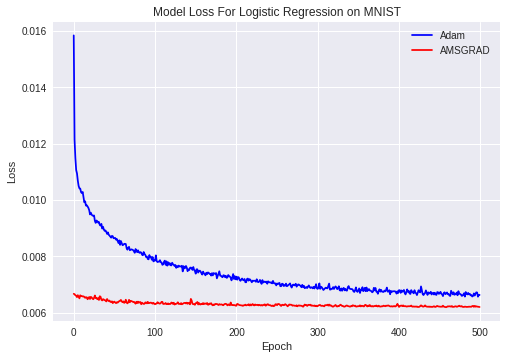

In [4]:
import matplotlib.pyplot as plt

plt.plot(history_f.history['loss'],label='Adam',color=(0,0,1))
plt.plot(history_t.history['loss'],label='AMSGRAD', color=(1,0,0))

plt.title('Model Loss For Logistic Regression on MNIST')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## 3. Neural Network
Below the codes for the neural network experiment on the MNIST data set is presented. The results of this experiment is shown in the Figure $2$ of the report.

In [2]:
# Fit the model
model = Sequential([
Dense(100, input_shape=(784,)),
Activation('relu'),
Dense(10),
Activation('softmax'),])

# define our model

adamObj_t = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
adamObj_f = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mse', optimizer=adamObj_t)
history_t_nn = model.fit(X_train, y_train, nb_epoch=500, batch_size = 128)

model.compile(loss='mse', optimizer=adamObj_f)
history_f_nn = model.fit(X_train, y_train, nb_epoch=500, batch_size = 128)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print(" Acc: %.2f%%" % (100-scores*100))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
60000/60000 [==============================] - 3s 52us/step - loss: 0.0120
Epoch 2/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0065
Epoch 3/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0059
Epoch 4/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0055
Epoch 5/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0053
Epoch 6/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0048
Epoch 7/500
 1152/60000 [..............................] - ETA: 3s - loss: 0.0039

60000/60000 [==============================] - 3s 47us/step - loss: 0.0049
Epoch 8/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0044
Epoch 9/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0048
Epoch 10/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0042
Epoch 11/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0040
Epoch 12/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0038
Epoch 13/500
11392/60000 [====>.........................] - ETA: 2s - loss: 0.0036

60000/60000 [==============================] - 3s 46us/step - loss: 0.0038
Epoch 14/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0039
Epoch 15/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0040
Epoch 16/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0040
Epoch 17/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0042
Epoch 18/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0041
Epoch 19/500
10368/60000 [====>.........................] - ETA: 2s - loss: 0.0036

60000/60000 [==============================] - 3s 46us/step - loss: 0.0039
Epoch 20/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0038
Epoch 21/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0037
Epoch 22/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0036
Epoch 23/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0036
Epoch 24/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0036
Epoch 25/500
10112/60000 [====>.........................] - ETA: 2s - loss: 0.0030

60000/60000 [==============================] - 3s 46us/step - loss: 0.0036
Epoch 26/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0032
Epoch 27/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0034
Epoch 28/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 29/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 30/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0033
Epoch 31/500
10624/60000 [====>.........................] - ETA: 2s - loss: 0.0038

60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 32/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0037
Epoch 33/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0029
Epoch 34/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0030
Epoch 35/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 36/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0031
Epoch 37/500
10496/60000 [====>.........................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 38/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 39/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 40/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0030
Epoch 41/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0031
Epoch 42/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 43/500
 8832/60000 [===>..........................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 47us/step - loss: 0.0027
Epoch 44/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 45/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 46/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0028
Epoch 47/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 48/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 49/500
10624/60000 [====>.........................] - ETA: 2s - loss: 0.0034

60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 50/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 51/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 52/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0027
Epoch 53/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 54/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0027
Epoch 55/500
10368/60000 [====>.........................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 47us/step - loss: 0.0029
Epoch 56/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0030
Epoch 57/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 58/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0028
Epoch 59/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 60/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 61/500
 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 47us/step - loss: 0.0028
Epoch 62/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 63/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0032
Epoch 64/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0025
Epoch 65/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0025
Epoch 66/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 67/500
 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0027

60000/60000 [==============================] - 3s 47us/step - loss: 0.0023
Epoch 68/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 69/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0025
Epoch 70/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0025
Epoch 71/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 72/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 73/500
11008/60000 [====>.........................] - ETA: 2s - loss: 0.0022

60000/60000 [==============================] - 3s 48us/step - loss: 0.0023
Epoch 74/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0023
Epoch 75/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0023
Epoch 76/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 77/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 78/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 79/500
 8832/60000 [===>..........................] - ETA: 2s - loss: 0.0023

60000/60000 [==============================] - 3s 47us/step - loss: 0.0022
Epoch 80/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0023
Epoch 81/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0023
Epoch 82/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 83/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0025
Epoch 84/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0025
Epoch 85/500
 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 46us/step - loss: 0.0022
Epoch 86/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0020
Epoch 87/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0020
Epoch 88/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0023
Epoch 89/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 90/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0025
Epoch 91/500
11520/60000 [====>.........................] - ETA: 2s - loss: 0.0024

60000/60000 [==============================] - 3s 46us/step - loss: 0.0023
Epoch 92/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0022
Epoch 93/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0025
Epoch 94/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0023
Epoch 95/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0027
Epoch 96/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 97/500
 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0024

60000/60000 [==============================] - 3s 47us/step - loss: 0.0028
Epoch 98/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 99/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0021
Epoch 100/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0023
Epoch 101/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 102/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 103/500
 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0024

60000/60000 [==============================] - 3s 46us/step - loss: 0.0022
Epoch 104/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0023
Epoch 105/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0026
Epoch 106/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0023
Epoch 107/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0022
Epoch 108/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 109/500
 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0022

60000/60000 [==============================] - 3s 47us/step - loss: 0.0028
Epoch 110/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 111/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0028
Epoch 112/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 113/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0021
Epoch 114/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 115/500
 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0025

60000/60000 [==============================] - 3s 47us/step - loss: 0.0026
Epoch 116/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 117/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 118/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0022
Epoch 119/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0020
Epoch 120/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0022
Epoch 121/500
 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0017

60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 122/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 123/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 124/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0021
Epoch 125/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 126/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 127/500
 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0019

60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 128/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0020
Epoch 129/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0022
Epoch 130/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 131/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0024
Epoch 132/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0019
Epoch 133/500
 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0014

60000/60000 [==============================] - 3s 47us/step - loss: 0.0019
Epoch 134/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0018
Epoch 135/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 136/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0021
Epoch 137/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0020
Epoch 138/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0019
Epoch 139/500
 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0022

60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 140/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0019
Epoch 141/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0017
Epoch 142/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0023
Epoch 143/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0021
Epoch 144/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0018
Epoch 145/500
 8192/60000 [===>..........................] - ETA: 2s - loss: 0.0018

60000/60000 [==============================] - 3s 46us/step - loss: 0.0022
Epoch 146/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0022
Epoch 147/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0022
Epoch 148/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 149/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0020
Epoch 150/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0020
Epoch 151/500
 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0020

60000/60000 [==============================] - 3s 46us/step - loss: 0.0023
Epoch 152/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0018
Epoch 153/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0019
Epoch 154/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0019
Epoch 155/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0019
Epoch 156/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0021
Epoch 157/500
 8192/60000 [===>..........................] - ETA: 2s - loss: 0.0021

60000/60000 [==============================] - 3s 47us/step - loss: 0.0017
Epoch 158/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0018
Epoch 159/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0018
Epoch 160/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0020
Epoch 161/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0017
Epoch 162/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0017
Epoch 163/500
 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0020

60000/60000 [==============================] - 3s 46us/step - loss: 0.0022
Epoch 164/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0022
Epoch 165/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0021
Epoch 166/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0019
Epoch 167/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0017
Epoch 168/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0016
Epoch 169/500
 5504/60000 [=>............................] - ETA: 2s - loss: 0.0017

60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 170/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0017
Epoch 171/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0020
Epoch 172/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0018
Epoch 173/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0017
Epoch 174/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0018
Epoch 175/500
 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0019

60000/60000 [==============================] - 3s 47us/step - loss: 0.0018
Epoch 176/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0017
Epoch 177/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 178/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0016
Epoch 179/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0017
Epoch 180/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0017
Epoch 181/500
 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0014

60000/60000 [==============================] - 3s 46us/step - loss: 0.0016
Epoch 182/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0019
Epoch 183/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0018
Epoch 184/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0017
Epoch 185/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 186/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0016
Epoch 187/500
 8192/60000 [===>..........................] - ETA: 2s - loss: 0.0015

60000/60000 [==============================] - 3s 46us/step - loss: 0.0017
Epoch 188/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0017
Epoch 189/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0016
Epoch 190/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 191/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 192/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0016
Epoch 193/500
10624/60000 [====>.........................] - ETA: 2s - loss: 0.0015

60000/60000 [==============================] - 3s 47us/step - loss: 0.0016
Epoch 194/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0016
Epoch 195/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 196/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 197/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 198/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 199/500
 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0017

60000/60000 [==============================] - 3s 47us/step - loss: 0.0020
Epoch 200/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0017
Epoch 201/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0016
Epoch 202/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 203/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 204/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0017
Epoch 205/500
11392/60000 [====>.........................] - ETA: 2s - loss: 0.0014

60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 206/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 207/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 208/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0014
Epoch 209/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 210/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 211/500
 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0014

60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 212/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 213/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 214/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0016
Epoch 215/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 216/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 217/500
 7808/60000 [==>...........................] - ETA: 2s - loss: 8.8346e-04

60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 218/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 219/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 220/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 221/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 222/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 223/500
 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0013

60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 224/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 225/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 226/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 227/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 228/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 229/500
 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0014

60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 230/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 231/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0016
Epoch 232/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 233/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 234/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0017
Epoch 235/500
 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0015

60000/60000 [==============================] - 3s 46us/step - loss: 0.0017
Epoch 236/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 237/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0015
Epoch 238/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 239/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 240/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 241/500
 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0011

60000/60000 [==============================] - 3s 48us/step - loss: 0.0015
Epoch 242/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 243/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 244/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 245/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 246/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 247/500
 6784/60000 [==>...........................] - ETA: 2s - loss: 9.7747e-04

60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 248/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 249/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 250/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0016
Epoch 251/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 252/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 253/500
 6912/60000 [==>...........................] - ETA: 2s - loss: 0.0012

60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 254/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 255/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 256/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 257/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 258/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 259/500
 3456/60000 [>.............................] - ETA: 2s - loss: 0.0012

60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 260/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 261/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 262/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 263/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 264/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 265/500
 4864/60000 [=>............................] - ETA: 2s - loss: 0.0016

60000/60000 [==============================] - 3s 47us/step - loss: 0.0016
Epoch 266/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 267/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 268/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 269/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0013
Epoch 270/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 271/500
 4608/60000 [=>............................] - ETA: 2s - loss: 0.0015

60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 272/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 273/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 274/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 275/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 276/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 277/500
 7680/60000 [==>...........................] - ETA: 2s - loss: 9.2901e-04

60000/60000 [==============================] - 3s 48us/step - loss: 0.0012
Epoch 278/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 279/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 280/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 281/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 282/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 283/500
 6784/60000 [==>...........................] - ETA: 2s - loss: 0.0014

60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 284/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 285/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 286/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 287/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 288/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 289/500
 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0012

60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 290/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 291/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 292/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 293/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 294/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 295/500
 7552/60000 [==>...........................] - ETA: 2s - loss: 0.0011    

60000/60000 [==============================] - 3s 47us/step - loss: 0.0014
Epoch 296/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 297/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 298/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 299/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 300/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 301/500
 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0011

60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 302/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 303/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 304/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 305/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 306/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 307/500
 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0011

60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 308/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 309/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 310/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 311/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 312/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 313/500
 7808/60000 [==>...........................] - ETA: 2s - loss: 0.0013

60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 314/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 315/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0010
Epoch 316/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 317/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 318/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0010
Epoch 319/500
 5632/60000 [=>............................] - ETA: 2s - loss: 8.5228e-04

60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 320/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 321/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 322/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 323/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0013
Epoch 324/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 325/500
 6912/60000 [==>...........................] - ETA: 2s - loss: 0.0013

60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 326/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 327/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0014
Epoch 328/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 329/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 330/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 331/500
 5760/60000 [=>............................] - ETA: 2s - loss: 0.0010    

60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 332/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 333/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 334/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 335/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 336/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0015
Epoch 337/500
 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0013

60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 338/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 339/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0013
Epoch 340/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 341/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 342/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 343/500
 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0011

60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 344/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 345/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 346/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 347/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 348/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0010
Epoch 349/500
 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0010

60000/60000 [==============================] - 3s 46us/step - loss: 0.0010
Epoch 350/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.7667e-04
Epoch 351/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.3865e-04
Epoch 352/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.9574e-04
Epoch 353/500
60000/60000 [==============================] - 3s 46us/step - loss: 9.6525e-04
Epoch 354/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.1846e-04
Epoch 355/500
 2432/60000 [>.............................] - ETA: 2s - loss: 9.4397e-04

60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 356/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 357/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 358/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 359/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.4356e-04
Epoch 360/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 361/500
 4608/60000 [=>............................] - ETA: 2s - loss: 0.0012

60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 362/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 363/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 364/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.5533e-04
Epoch 365/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0010
Epoch 366/500
60000/60000 [==============================] - 3s 46us/step - loss: 9.9783e-04
Epoch 367/500
 5760/60000 [=>............................] - ETA: 2s - loss: 9.0857e-04

60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 368/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 369/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 370/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 371/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 372/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 373/500
 8320/60000 [===>..........................] - ETA: 2s - loss: 9.7549e-04

60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 374/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 375/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 376/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0013
Epoch 377/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 378/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 379/500
 6912/60000 [==>...........................] - ETA: 2s - loss: 9.7901e-04

60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 380/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 381/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 382/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 383/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 384/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 385/500
 4864/60000 [=>............................] - ETA: 2s - loss: 0.0015

60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 386/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0010
Epoch 387/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 388/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 389/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.8316e-04
Epoch 390/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0010
Epoch 391/500
 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0010

60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 392/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 393/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 394/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.5827e-04
Epoch 395/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.6029e-04
Epoch 396/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.9725e-04
Epoch 397/500
 4224/60000 [=>............................] - ETA: 2s - loss: 0.0013

60000/60000 [==============================] - 3s 47us/step - loss: 9.7877e-04
Epoch 398/500
60000/60000 [==============================] - 3s 46us/step - loss: 9.9853e-04
Epoch 399/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.9283e-04
Epoch 400/500
60000/60000 [==============================] - 3s 46us/step - loss: 8.3998e-04
Epoch 401/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.8940e-04
Epoch 402/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.8852e-04


Epoch 403/500
60000/60000 [==============================] - 3s 46us/step - loss: 9.4822e-04
Epoch 404/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0010
Epoch 405/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 406/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0012
Epoch 407/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 408/500
55040/60000 [==========================>...] - ETA: 0s - loss: 0.0012

60000/60000 [==============================] - 3s 47us/step - loss: 0.0012
Epoch 409/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 410/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0010
Epoch 411/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 412/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 413/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.6726e-04
Epoch 414/500
11264/60000 [====>.........................] - ETA: 2s - loss: 0.0011

60000/60000 [==============================] - 3s 47us/step - loss: 0.0011
Epoch 415/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.2928e-04
Epoch 416/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.2768e-04
Epoch 417/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.8109e-04
Epoch 418/500
60000/60000 [==============================] - 3s 48us/step - loss: 8.9535e-04
Epoch 419/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.7185e-04


Epoch 420/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.6308e-04
Epoch 421/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.9013e-04
Epoch 422/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.0787e-04
Epoch 423/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.5394e-04
Epoch 424/500
60000/60000 [==============================] - 3s 46us/step - loss: 9.1610e-04
Epoch 425/500
50560/60000 [========================>.....] - ETA: 0s - loss: 8.3434e-04

60000/60000 [==============================] - 3s 47us/step - loss: 8.3310e-04
Epoch 426/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.0909e-04
Epoch 427/500
60000/60000 [==============================] - 3s 46us/step - loss: 8.8479e-04
Epoch 428/500
60000/60000 [==============================] - 3s 46us/step - loss: 9.0723e-04
Epoch 429/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 430/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.8648e-04
Epoch 431/500
 5760/60000 [=>............................] - ETA: 2s - loss: 9.3734e-04

60000/60000 [==============================] - 3s 47us/step - loss: 8.9225e-04
Epoch 432/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.3471e-04
Epoch 433/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.5722e-04
Epoch 434/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.1223e-04
Epoch 435/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.3633e-04
Epoch 436/500
58240/60000 [============================>.] - ETA: 0s - loss: 8.1729e-04

60000/60000 [==============================] - 3s 47us/step - loss: 8.1855e-04
Epoch 437/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.9848e-04
Epoch 438/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.4142e-04
Epoch 439/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.8933e-04
Epoch 440/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.6161e-04
Epoch 441/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.9458e-04
Epoch 442/500
 3456/60000 [>.............................] - ETA: 2s - loss: 7.5231e-04

60000/60000 [==============================] - 3s 48us/step - loss: 8.1387e-04
Epoch 443/500
60000/60000 [==============================] - 3s 48us/step - loss: 8.6992e-04
Epoch 444/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.1318e-04
Epoch 445/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.0173e-04
Epoch 446/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.2294e-04
Epoch 447/500
58880/60000 [============================>.] - ETA: 0s - loss: 8.0152e-04

60000/60000 [==============================] - 3s 47us/step - loss: 8.0645e-04
Epoch 448/500
60000/60000 [==============================] - 3s 46us/step - loss: 8.8765e-04
Epoch 449/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.8042e-04
Epoch 450/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.7535e-04
Epoch 451/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.3758e-04
Epoch 452/500
60000/60000 [==============================] - 3s 46us/step - loss: 8.4569e-04
Epoch 453/500
 6016/60000 [==>...........................] - ETA: 2s - loss: 7.8983e-04

60000/60000 [==============================] - 3s 47us/step - loss: 8.3796e-04
Epoch 454/500
60000/60000 [==============================] - 3s 46us/step - loss: 9.1349e-04
Epoch 455/500
60000/60000 [==============================] - 3s 46us/step - loss: 8.1849e-04
Epoch 456/500
60000/60000 [==============================] - 3s 46us/step - loss: 8.0642e-04
Epoch 457/500
60000/60000 [==============================] - 3s 46us/step - loss: 7.8126e-04
Epoch 458/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.7911e-04


Epoch 459/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.9788e-04
Epoch 460/500
60000/60000 [==============================] - 3s 46us/step - loss: 7.9245e-04
Epoch 461/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.4898e-04
Epoch 462/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.2015e-04
Epoch 463/500
60000/60000 [==============================] - 3s 46us/step - loss: 7.8927e-04
Epoch 464/500
50176/60000 [========================>.....] - ETA: 0s - loss: 9.5899e-04

60000/60000 [==============================] - 3s 46us/step - loss: 9.7387e-04
Epoch 465/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0011
Epoch 466/500
60000/60000 [==============================] - 3s 46us/step - loss: 8.8815e-04
Epoch 467/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.3180e-04
Epoch 468/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.1120e-04
Epoch 469/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.6652e-04
Epoch 470/500
 7040/60000 [==>...........................] - ETA: 2s - loss: 5.6818e-04

60000/60000 [==============================] - 3s 47us/step - loss: 7.5320e-04
Epoch 471/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.6783e-04
Epoch 472/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.6163e-04
Epoch 473/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.6260e-04
Epoch 474/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.8727e-04
Epoch 475/500
58240/60000 [============================>.] - ETA: 0s - loss: 8.0320e-04

60000/60000 [==============================] - 3s 47us/step - loss: 8.0631e-04
Epoch 476/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.8639e-04
Epoch 477/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.2836e-04
Epoch 478/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.7798e-04
Epoch 479/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.6426e-04
Epoch 480/500
60000/60000 [==============================] - 3s 47us/step - loss: 9.1633e-04
Epoch 481/500
 4736/60000 [=>............................] - ETA: 2s - loss: 8.9015e-04

60000/60000 [==============================] - 3s 46us/step - loss: 8.0095e-04
Epoch 482/500
60000/60000 [==============================] - 3s 46us/step - loss: 7.6977e-04
Epoch 483/500
60000/60000 [==============================] - 3s 46us/step - loss: 7.5710e-04
Epoch 484/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.4016e-04
Epoch 485/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.3072e-04
Epoch 486/500
59520/60000 [============================>.] - ETA: 0s - loss: 7.8684e-04

60000/60000 [==============================] - 3s 47us/step - loss: 7.8388e-04
Epoch 487/500
60000/60000 [==============================] - 3s 46us/step - loss: 7.9206e-04
Epoch 488/500
60000/60000 [==============================] - 3s 46us/step - loss: 8.4668e-04
Epoch 489/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.1852e-04
Epoch 490/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.6227e-04
Epoch 491/500
60000/60000 [==============================] - 3s 46us/step - loss: 8.7889e-04
Epoch 492/500
 4736/60000 [=>............................] - ETA: 2s - loss: 6.3344e-04

60000/60000 [==============================] - 3s 46us/step - loss: 8.0189e-04
Epoch 493/500
60000/60000 [==============================] - 3s 46us/step - loss: 7.5480e-04
Epoch 494/500
60000/60000 [==============================] - 3s 46us/step - loss: 7.9213e-04
Epoch 495/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.7330e-04
Epoch 496/500
60000/60000 [==============================] - 3s 47us/step - loss: 7.9856e-04
Epoch 497/500
60000/60000 [==============================] - 3s 46us/step - loss: 7.8463e-04


Epoch 498/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.4536e-04
Epoch 499/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.4745e-04
Epoch 500/500
60000/60000 [==============================] - 3s 47us/step - loss: 8.9983e-04
Epoch 1/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0010
Epoch 2/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0016
Epoch 3/500
58240/60000 [============================>.] - ETA: 0s - loss: 0.0017

60000/60000 [==============================] - 3s 45us/step - loss: 0.0017
Epoch 4/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0024
Epoch 5/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0024
Epoch 6/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 7/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 8/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 9/500
21504/60000 [=========>....................] - ETA: 1s - loss: 0.0025

60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 10/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 11/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 12/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0022
Epoch 13/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 14/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0024
Epoch 15/500
18944/60000 [========>.....................] - ETA: 1s - loss: 0.0023

60000/60000 [==============================] - 3s 46us/step - loss: 0.0025
Epoch 16/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0019
Epoch 17/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0022
Epoch 18/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0023
Epoch 19/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 20/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 21/500
16640/60000 [=======>......................] - ETA: 1s - loss: 0.0024

60000/60000 [==============================] - 3s 45us/step - loss: 0.0024
Epoch 22/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 23/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 24/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 25/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 26/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 27/500
15232/60000 [======>.......................] - ETA: 2s - loss: 0.0035

60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 28/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0032
Epoch 29/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 30/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 31/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 32/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0034
Epoch 33/500
16512/60000 [=======>......................] - ETA: 1s - loss: 0.0035

60000/60000 [==============================] - 3s 45us/step - loss: 0.0036
Epoch 34/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 35/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 36/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 37/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 38/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 39/500
17664/60000 [=======>......................] - ETA: 1s - loss: 0.0028

60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 40/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 41/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 42/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 43/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 44/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 45/500
14592/60000 [======>.......................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 46/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 47/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 48/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 49/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0035
Epoch 50/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0038
Epoch 51/500
15360/60000 [======>.......................] - ETA: 2s - loss: 0.0025

60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 52/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 53/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 54/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 55/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 56/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 57/500
15872/60000 [======>.......................] - ETA: 2s - loss: 0.0028

60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 58/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 59/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0038
Epoch 60/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 61/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 62/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 63/500
15744/60000 [======>.......................] - ETA: 1s - loss: 0.0041

60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 64/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 65/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 66/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 67/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 68/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 69/500
13056/60000 [=====>........................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 70/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 71/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 72/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 73/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 74/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 75/500
14080/60000 [======>.......................] - ETA: 2s - loss: 0.0022

60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 76/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 77/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 78/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 79/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 80/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 81/500
16000/60000 [=======>......................] - ETA: 2s - loss: 0.0028

60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 82/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 83/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 84/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0035
Epoch 85/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 86/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 87/500
15488/60000 [======>.......................] - ETA: 1s - loss: 0.0028

60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 88/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 89/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 90/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 91/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 92/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 93/500
14080/60000 [======>.......................] - ETA: 2s - loss: 0.0034

60000/60000 [==============================] - 3s 46us/step - loss: 0.0036
Epoch 94/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 95/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 96/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 97/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 98/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0025
Epoch 99/500
15104/60000 [======>.......................] - ETA: 2s - loss: 0.0031

60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 100/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0040
Epoch 101/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 102/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 103/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 104/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 105/500
14464/60000 [======>.......................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 44us/step - loss: 0.0028
Epoch 106/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0037
Epoch 107/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 108/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 109/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 110/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 111/500
15232/60000 [======>.......................] - ETA: 2s - loss: 0.0031

60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 112/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 113/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 114/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 115/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 116/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 117/500
15872/60000 [======>.......................] - ETA: 1s - loss: 0.0026

60000/60000 [==============================] - 3s 44us/step - loss: 0.0027
Epoch 118/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 119/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 120/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0034
Epoch 121/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 122/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 123/500
15360/60000 [======>.......................] - ETA: 1s - loss: 0.0025

60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 124/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 125/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 126/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 127/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 128/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0036
Epoch 129/500
13184/60000 [=====>........................] - ETA: 2s - loss: 0.0031

60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 130/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 131/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 132/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 133/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 134/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 135/500
12416/60000 [=====>........................] - ETA: 2s - loss: 0.0035

60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 136/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 137/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 138/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0048
Epoch 139/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 140/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0036
Epoch 141/500
11648/60000 [====>.........................] - ETA: 2s - loss: 0.0038

60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 142/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 143/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 144/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 145/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 146/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 147/500
15232/60000 [======>.......................] - ETA: 2s - loss: 0.0035

60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 148/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 149/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 150/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 151/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 152/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 153/500
15744/60000 [======>.......................] - ETA: 1s - loss: 0.0033

60000/60000 [==============================] - 3s 45us/step - loss: 0.0039
Epoch 154/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0036
Epoch 155/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0038
Epoch 156/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 157/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 158/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 159/500
15232/60000 [======>.......................] - ETA: 2s - loss: 0.0031

60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 160/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 161/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 162/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 163/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 164/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 165/500
15616/60000 [======>.......................] - ETA: 2s - loss: 0.0033

60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 166/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0037
Epoch 167/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 168/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 169/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 170/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 171/500
16256/60000 [=======>......................] - ETA: 2s - loss: 0.0028

60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 172/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 173/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 174/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 175/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 176/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 177/500
15232/60000 [======>.......................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 178/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 179/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 180/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 181/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0037
Epoch 182/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 183/500
17024/60000 [=======>......................] - ETA: 1s - loss: 0.0036

60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 184/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 185/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 186/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 187/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 188/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0037
Epoch 189/500
15104/60000 [======>.......................] - ETA: 2s - loss: 0.0033

60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 190/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 191/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 192/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 193/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0035
Epoch 194/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 195/500
11648/60000 [====>.........................] - ETA: 2s - loss: 0.0027

60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 196/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 197/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 198/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0030
Epoch 199/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 200/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 201/500
15104/60000 [======>.......................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 202/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 203/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 204/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0029
Epoch 205/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 206/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 207/500
14080/60000 [======>.......................] - ETA: 2s - loss: 0.0034

60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 208/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0037
Epoch 209/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 210/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 211/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0036
Epoch 212/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 213/500
14720/60000 [======>.......................] - ETA: 1s - loss: 0.0042

60000/60000 [==============================] - 3s 45us/step - loss: 0.0042
Epoch 214/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0044
Epoch 215/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 216/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 217/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 218/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 219/500
15488/60000 [======>.......................] - ETA: 1s - loss: 0.0030

60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 220/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0041
Epoch 221/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0037
Epoch 222/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 223/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 224/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 225/500
15744/60000 [======>.......................] - ETA: 1s - loss: 0.0030

60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 226/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 227/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0032
Epoch 228/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 229/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 230/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 231/500
12928/60000 [=====>........................] - ETA: 2s - loss: 0.0033

60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 232/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 233/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 234/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 235/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 236/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 237/500
12928/60000 [=====>........................] - ETA: 2s - loss: 0.0038

60000/60000 [==============================] - 3s 45us/step - loss: 0.0036
Epoch 238/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 239/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 240/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 241/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 242/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 243/500
14208/60000 [======>.......................] - ETA: 2s - loss: 0.0038

60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 244/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 245/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 246/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 247/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 248/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 249/500
14208/60000 [======>.......................] - ETA: 2s - loss: 0.0040

60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 250/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 251/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 252/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 253/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0033
Epoch 254/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 255/500
14720/60000 [======>.......................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 256/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 257/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0024
Epoch 258/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 259/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 260/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 261/500
13952/60000 [=====>........................] - ETA: 2s - loss: 0.0030

60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 262/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 263/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 264/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 265/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 266/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 267/500
14080/60000 [======>.......................] - ETA: 2s - loss: 0.0031

60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 268/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 269/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 270/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 271/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 272/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 273/500
18048/60000 [========>.....................] - ETA: 1s - loss: 0.0032

60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 274/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 275/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 276/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 277/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 278/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 279/500
12928/60000 [=====>........................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 280/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 281/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0025
Epoch 282/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 283/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 284/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 285/500
11648/60000 [====>.........................] - ETA: 2s - loss: 0.0024

60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 286/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 287/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 288/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 289/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 290/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0036
Epoch 291/500
11648/60000 [====>.........................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 292/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 293/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 294/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0036
Epoch 295/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 296/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 297/500
13184/60000 [=====>........................] - ETA: 2s - loss: 0.0023

60000/60000 [==============================] - 3s 45us/step - loss: 0.0023
Epoch 298/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 299/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0037
Epoch 300/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 301/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 302/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 303/500
11520/60000 [====>.........................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 304/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 305/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 306/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0035
Epoch 307/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0036
Epoch 308/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 309/500
12672/60000 [=====>........................] - ETA: 2s - loss: 0.0031

60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 310/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 311/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 312/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 313/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 314/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 315/500
12160/60000 [=====>........................] - ETA: 2s - loss: 0.0030

60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 316/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 317/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 318/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 319/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0038
Epoch 320/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 321/500
13824/60000 [=====>........................] - ETA: 2s - loss: 0.0034

60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 322/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 323/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 324/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 325/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 326/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 327/500
16640/60000 [=======>......................] - ETA: 1s - loss: 0.0029

60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 328/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 329/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0035
Epoch 330/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 331/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 332/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 333/500
11776/60000 [====>.........................] - ETA: 2s - loss: 0.0022

60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 334/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 335/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 336/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 337/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 338/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 339/500
11904/60000 [====>.........................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 340/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0026
Epoch 341/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 342/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0023
Epoch 343/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 344/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 345/500
15360/60000 [======>.......................] - ETA: 2s - loss: 0.0037

60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 346/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 347/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 348/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 349/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 350/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 351/500
13952/60000 [=====>........................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 352/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 353/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 354/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 355/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 356/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 357/500
11904/60000 [====>.........................] - ETA: 2s - loss: 0.0022

60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 358/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0023
Epoch 359/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0023
Epoch 360/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 361/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0025
Epoch 362/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 363/500
13056/60000 [=====>........................] - ETA: 2s - loss: 0.0025

60000/60000 [==============================] - 3s 45us/step - loss: 0.0024
Epoch 364/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0023
Epoch 365/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0024
Epoch 366/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 367/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 368/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 369/500
13824/60000 [=====>........................] - ETA: 2s - loss: 0.0025

60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 370/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 371/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 372/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0025
Epoch 373/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0023
Epoch 374/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0023
Epoch 375/500
13952/60000 [=====>........................] - ETA: 2s - loss: 0.0024

60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 376/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 377/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 378/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 379/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 380/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 381/500
11648/60000 [====>.........................] - ETA: 2s - loss: 0.0033

60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 382/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 383/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 384/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 385/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 386/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 387/500
15360/60000 [======>.......................] - ETA: 2s - loss: 0.0035

60000/60000 [==============================] - 3s 45us/step - loss: 0.0033
Epoch 388/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 389/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 390/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 391/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 392/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 393/500
14976/60000 [======>.......................] - ETA: 2s - loss: 0.0031

60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 394/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0024
Epoch 395/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 396/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 397/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 398/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 399/500
11392/60000 [====>.........................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 400/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 401/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 402/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 403/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 404/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0025
Epoch 405/500
12800/60000 [=====>........................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 406/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 407/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 408/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 409/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 410/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 411/500
11776/60000 [====>.........................] - ETA: 2s - loss: 0.0037

60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 412/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.0028
Epoch 413/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 414/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 415/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 416/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0025
Epoch 417/500
15232/60000 [======>.......................] - ETA: 2s - loss: 0.0031

60000/60000 [==============================] - 3s 45us/step - loss: 0.0032
Epoch 418/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 419/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 420/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 421/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 422/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 423/500
14720/60000 [======>.......................] - ETA: 2s - loss: 0.0027

60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 424/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 425/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0023
Epoch 426/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 427/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 428/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 429/500
13056/60000 [=====>........................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 430/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 431/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 432/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 433/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 434/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 435/500
12800/60000 [=====>........................] - ETA: 2s - loss: 0.0026

60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 436/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 437/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0024
Epoch 438/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0023
Epoch 439/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0023
Epoch 440/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 441/500
13696/60000 [=====>........................] - ETA: 2s - loss: 0.0024

60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 442/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 443/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 444/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 445/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0029
Epoch 446/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 447/500
 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0034

60000/60000 [==============================] - 3s 46us/step - loss: 0.0036
Epoch 448/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 449/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 450/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0029
Epoch 451/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0026
Epoch 452/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 453/500
14080/60000 [======>.......................] - ETA: 2s - loss: 0.0034

60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 454/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0036
Epoch 455/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 456/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 457/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 458/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 459/500
12032/60000 [=====>........................] - ETA: 2s - loss: 0.0030

60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 460/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0025
Epoch 461/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 462/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 463/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0022
Epoch 464/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0023
Epoch 465/500
12160/60000 [=====>........................] - ETA: 2s - loss: 0.0025

60000/60000 [==============================] - 3s 45us/step - loss: 0.0023
Epoch 466/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0024
Epoch 467/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 468/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 469/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 470/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 471/500
 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0036

60000/60000 [==============================] - 3s 46us/step - loss: 0.0034
Epoch 472/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 473/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 474/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0036
Epoch 475/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0034
Epoch 476/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 477/500
10624/60000 [====>.........................] - ETA: 2s - loss: 0.0025

60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 478/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 479/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0035
Epoch 480/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0031
Epoch 481/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 482/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 483/500
15488/60000 [======>.......................] - ETA: 2s - loss: 0.0024

60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 484/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 485/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0037
Epoch 486/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0033
Epoch 487/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0031
Epoch 488/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 489/500
13952/60000 [=====>........................] - ETA: 2s - loss: 0.0029

60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 490/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0029
Epoch 491/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0028
Epoch 492/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0028
Epoch 493/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027
Epoch 494/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0027
Epoch 495/500
14464/60000 [======>.......................] - ETA: 2s - loss: 0.0033

60000/60000 [==============================] - 3s 46us/step - loss: 0.0032
Epoch 496/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0030
Epoch 497/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0030
Epoch 498/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.0026
Epoch 499/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0025
Epoch 500/500
 7680/10000 [======================>.......] - ETA: 0s

10000/10000 [==============================] - 1s 68us/step
 Acc: 99.52%


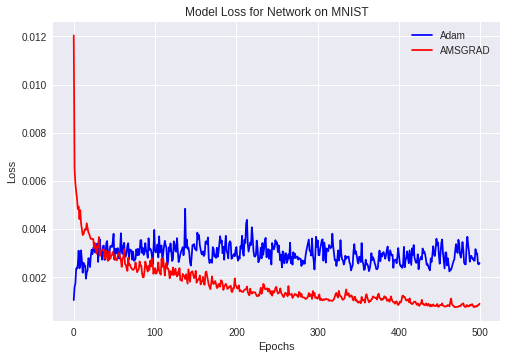

In [4]:
import matplotlib.pyplot as plt

plt.plot(history_f_nn.history['loss'],label='Adam',color=(0,0,1))
plt.plot(history_t_nn.history['loss'],label='AMSGRAD',color=(1,0,0))

plt.title('Model Loss for Network on MNIST')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()